### Problema 7.35
A função corrente para o campo de escoamento  em torno do canto de 90º é c = 8r 2 sen 2u. Mostre que  a continuidade do escoamento é satisfeita. Determine  os componentes da velocidade r e u de uma partícula  do fluido localizada em r = 0,5 m, u = 30º e desenhe a  linha de corrente que passa por esse ponto. Além disso, determine a função potencial para o escoamento. 

Hibbeler, R. C.. Mecânica dos fluidos (p. 361). Edição do Kindle. 

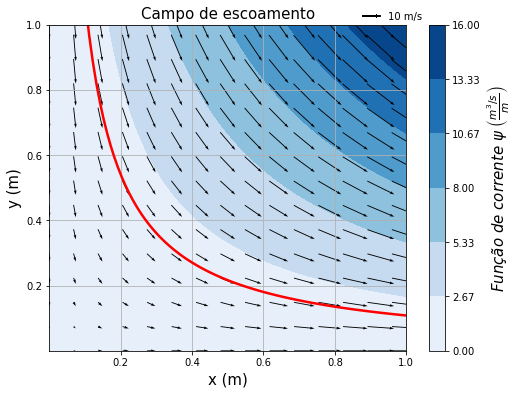

In [172]:
import numpy as np
import matplotlib.pyplot as plt

#Domínio de coordenadas
xmin=0.00001
xmax=1
ymin=0.00001
ymax=1

#==============================================================================
#Função para criação de malha de pontos no plano x-y
#==============================================================================
def malha(xmin, xmax, ymin, ymax, nx, ny):
    x = np.linspace(xmin, xmax, nx)    #Coordenadas x dos pontos da malha
    y = np.linspace(ymin, ymax, ny)    #Coordenadas y dos pontos da malha
    X, Y = np.meshgrid(x, y)           #Criação da malha
    return X, Y

#==============================================================================
#Função para criação da array de corrente
#==============================================================================
def func_corr(corrente):
    for i in range(np.shape(corrente)[0]):
        for j in range(np.shape(corrente)[1]):
            if corrente[i,j]<0:
                corrente[i,j]=0
            else:
                corrente[i,j]=corrente[i,j]
    return corrente

#==============================================================================
#Função para criação da array de velocidades
#==============================================================================
def func_vel(vel, fcorrente):
    for i in range(np.shape(fcorrente)[0]):
        for j in range(np.shape(fcorrente)[1]):
            if fcorrente[i,j]<0:
                vel[i,j]=0
                vel[i,j]=0
            else:
                vel[i,j]=vel[i,j]
                vel[i,j]=vel[i,j]
    return vel
#==============================================================================
#Plotagem do mapa de cores da função de corrente
#==============================================================================
X, Y = malha(xmin, xmax, ymin, ymax, 100, 100)

theta=np.arctan(Y/X)
r=np.sqrt(X**2+Y**2)
corrente=func_corr(8*(r**(2))*np.sin(2*theta))       #Função de corrente

fig = plt.figure(figsize=(8, 6))   #Tamanho da figura
ax = fig.add_subplot(111)          #Apenas uma figura
im = ax.contourf(X, Y,             #Plotagem da função de corrente
    corrente, cmap='Blues', levels=np.linspace(corrente.min(), corrente.max(), 7)) 
cbar=fig.colorbar(im)                   #Barra de cores
cbar.set_label(                    #Rótulo da barra de cores
    label=r'$Função\ de\ corrente\ \psi\ \left(\frac{m^{3}/s}{m}\right)$', size=15)

#==============================================================================
#Plotagem de vetores velocidade
#==============================================================================
X, Y = malha(xmin, xmax, ymin, ymax, 15, 15)
theta=np.arctan(Y/X)
r=np.sqrt(X**2+Y**2)
v_r=16*r**(1)*np.cos(2*theta)                            #Componente x da velocidade
v_theta=-16*r**(1)*np.sin(2*theta)                           #Componente y da velocidade
VR=(v_r**2+v_theta**2)**0.5
U=func_vel(v_r*np.cos(theta)-v_theta*np.sin(theta), 8*(r**(2))*np.sin(2*theta))
V=func_vel(v_r*np.sin(theta)+v_theta*np.cos(theta), 8*(r**(2))*np.sin(2*theta))


velocidade=ax.quiver(X, Y,       #Plotagem do vetor velocidade
    U, V, color='k', angles='xy', scale=200, width=0.0025, pivot='mid')
qk=ax.quiverkey(velocidade, 0.7, 0.9, 10, label='10 m/s', labelpos='E', coordinates='figure')

#Linha de corrente
#====================================================
###theta=
###r=
x=np.linspace(0.001,1,100)
y=np.sqrt(3)/(16*x)
plt.plot(x,y, color='r', linewidth=2.5)

#Edição do gráfico
#====================================================
plt.title('Campo de escoamento', fontsize=15)
plt.xlabel('x (m)', fontsize=15)
plt.ylabel('y (m)', fontsize=15)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid()
